# Credit Card Fraud Detection
**By - Ashish Ahuja**

In [ ]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [ ]:
#reading the data
data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
print("Shape: ",data.shape)
data.head(10)

Shape:  (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Non Fraudulent:  99.827 % of the total transactions.
Fraudulent:  0.173 % of the total transactions.


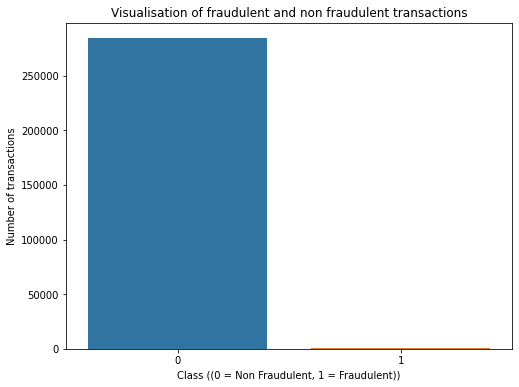

In [ ]:
print("Non Fraudulent: ", round(data["Class"].value_counts()[0]/len(data) * 100,3), "% of the total transactions.")
print("Fraudulent: ", round(data["Class"].value_counts()[1]/len(data) * 100,3), "% of the total transactions.")
plt.figure(figsize = (8,6))
sns.barplot(x = (data.Class.value_counts()).index, y = data.Class.value_counts())
plt.title("Visualisation of fraudulent and non fraudulent transactions")
plt.ylabel("Number of transactions")
plt.xlabel("Class ((0 = Non Fraudulent, 1 = Fraudulent))")
plt.show()

Text(0, 0.5, 'Amount')

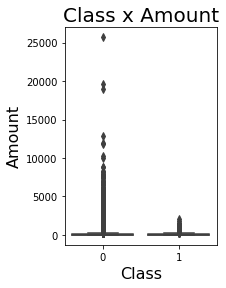

In [ ]:
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=data)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Class", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)

In [ ]:
print("Number of transactions with amount greater than 10000: ",(data[data.Amount > 10000]).shape[0])

Number of transactions with amount greater than 10000:  7


In [ ]:
#Out of 284807 transactions, only 7 transactions have amount greater than 10000, so we can remove these outliers from the dataset
mdata = data[data.Amount <= 10000]
print(mdata.shape)
mdata.describe()

(284800, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000,284800.000000
mean,94813.763445,0.000640,0.001001,0.000513,-0.000290,0.000814,-0.000447,-0.000911,0.000184,0.000047,0.000188,-0.000040,0.000039,-0.000068,-0.000042,-0.000072,-0.000103,0.000018,-0.000051,0.000065,-0.000349,-0.000082,0.000114,0.000211,-0.000026,0.000073,0.000013,-0.000074,0.000018,87.961847,0.001728
std,47488.030165,1.953903,1.636922,1.511632,1.414503,1.359957,1.324181,1.210728,1.193089,1.098576,1.088146,1.020636,0.999008,0.995137,0.958385,0.915125,0.875606,0.849233,0.838045,0.813658,0.752932,0.732389,0.724832,0.621770,0.605585,0.520649,0.482094,0.399034,0.328588,236.145430,0.041528
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-4.932733,-28.009635,-34.830382,-8.887017,-44.807735,-2.836627,-10.295397,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54202.750000,-0.920304,-0.598498,-0.890276,-0.848657,-0.691541,-0.768308,-0.554094,-0.208608,-0.643081,-0.535402,-0.762502,-0.405565,-0.648550,-0.425590,-0.582891,-0.468066,-0.483747,-0.498850,-0.456277,-0.211723,-0.228392,-0.542335,-0.161842,-0.354593,-0.317131,-0.326979,-0.070837,-0.052960,5.590000,0.000000
50%,84691.500000,0.018152,0.065522,0.179859,-0.019917,-0.054320,-0.274228,0.040079,0.022362,-0.051414,-0.092888,-0.032765,0.140029,-0.013586,0.050574,0.048040,0.066378,-0.065677,-0.003653,0.003740,-0.062485,-0.029451,0.006793,-0.011191,0.040966,0.016602,-0.052126,0.001343,0.011243,22.000000,0.000000
75%,139320.250000,1.315648,0.803742,1.027210,0.743302,0.611930,0.398461,0.570385,0.327354,0.597164,0.454001,0.739573,0.618207,0.662444,0.493114,0.648787,0.523272,0.399659,0.500770,0.458949,0.133019,0.186368,0.528553,0.147642,0.439523,0.350715,0.240950,0.091044,0.078278,77.150000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,22.529298,36.877368,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,8.289890,9.253526,4.295648,5.591971,23.643417,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,10000.000000,1.000000


Text(0, 0.5, 'Amount')

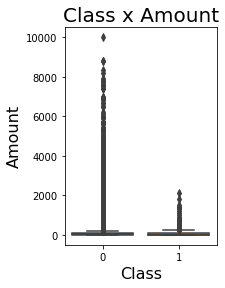

In [ ]:
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=mdata)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Class", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)

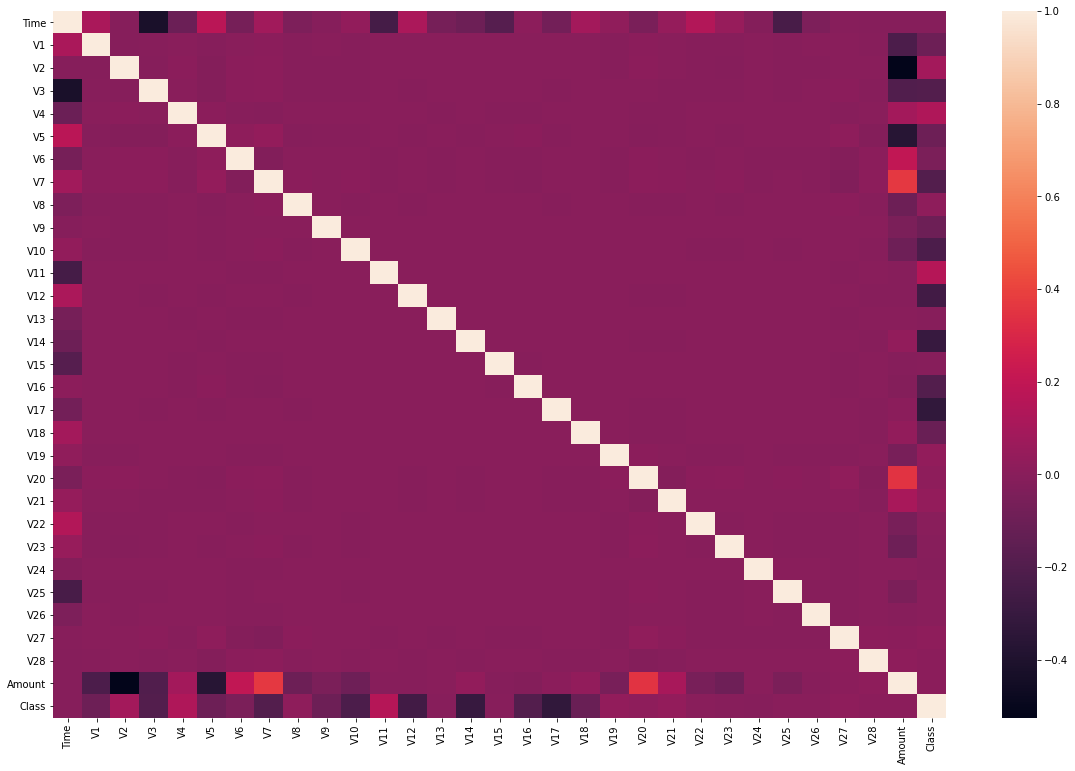

In [ ]:
plt.subplots(figsize=(20,13 ))
correlation_matrix = mdata.corr()
sns.heatmap(correlation_matrix, annot=False)

**Most of the correlations are indepenent of each other, while some of them are negatively correlated (strongly).
The attributes which are negatively correlated with the "Class" are: V10,V12, V14, V17**

In [ ]:
#check missing values
print("Number of missing values in the dataset: ", float(mdata.isnull().any().any()))

Number of missing values in the dataset:  0.0


In [ ]:
#scaling features using robust scaler as it can effectly be used in on imbalanced data
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
mdata["Scaled Amount"] = robust.fit_transform(mdata["Amount"].values.reshape(-1,1))
mdata["Scaled Time"] = robust.fit_transform(mdata["Time"].values.reshape(-1,1))
mdata.drop(["Time", "Amount"], axis = 1, inplace = True)
print(mdata.shape)
mdata.head(10)

(284800, 31)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaled Amount,Scaled Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783399,-0.994995
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269843,-0.994995
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.984069,-0.994983
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418390,-0.994983
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670626,-0.994972
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.256149,-0.994972
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.237703,-0.994948
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,0.262717,-0.994913
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.994969,-0.994913
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.256009,-0.994889


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
X = mdata.drop("Class", axis = 1)
Y = mdata["Class"]
stkf = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False)
for traini, testi in stkf.split(X,Y):
    Xtrain, Xtest = X.iloc[traini], X.iloc[testi]
    Ytrain, Ytest = Y.iloc[traini], Y.iloc[testi]
print("Total data",mdata.shape)
print("Xtrain",Xtrain.shape)
print("Ytrain",Ytrain.shape)
print("Xtest",Xtest.shape)
print("Ytest",Ytest.shape)

Total data (284800, 31)
Xtrain (227840, 30)
Ytrain (227840,)
Xtest (56960, 30)
Ytest (56960,)


In [ ]:
#importing all the models
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

**Fitting the models on train data**

In [ ]:
#Isolation Forest
f,nf = 0,0
for a in Ytrain:
    if(a==0):
        nf+=1
    else:
        f+=1
outfrac = f/nf
iso = IsolationForest(max_samples = len(Xtrain), contamination = outfrac, random_state = 1)
iso.fit(Xtrain.values, Ytrain.values)
ipred = iso.predict(Xtest.values)
ipred[ipred == 1] = 0
ipred[ipred == -1] = 1
#LogisticRegression
lr = LogisticRegression(max_iter = 500)
lr.fit(Xtrain.values, Ytrain.values)
lpred = lr.predict(Xtest.values)
#KNearest
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(Xtrain.values, Ytrain.values)
kpred = knn.predict(Xtest.values)
#Support Vector Classifier
svm = SVC()
svm.fit(Xtrain.values, Ytrain.values)
spred = svm.predict(Xtest.values)

**Testing the models on test data (on various factors like precision, recall, f1 score and confusion matrix)**

For Isolation Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.13      0.08      0.10        99

    accuracy                           1.00     56960
   macro avg       0.56      0.54      0.55     56960
weighted avg       1.00      1.00      1.00     56960

[[56806    55]
 [   91     8]]
For Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.94      0.48      0.64        99

    accuracy                           1.00     56960
   macro avg       0.97      0.74      0.82     56960
weighted avg       1.00      1.00      1.00     56960

[[56858     3]
 [   51    48]]
For KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.99      0.70      0.82        99

    accuracy                           1.00     56960
   macro avg 

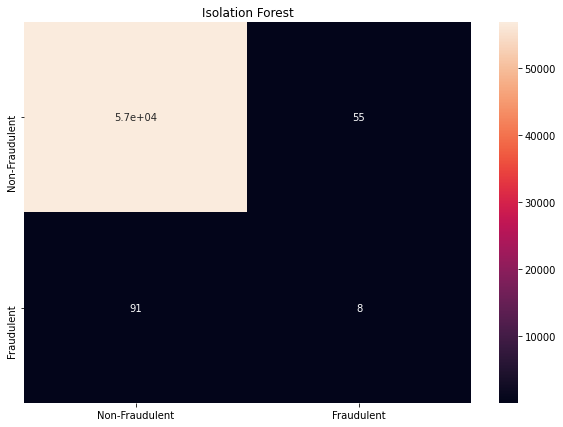

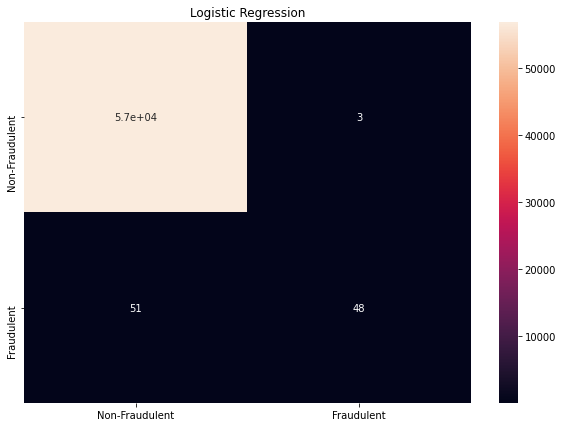

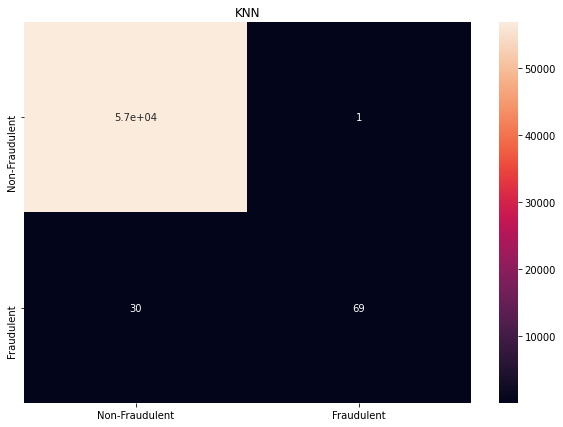

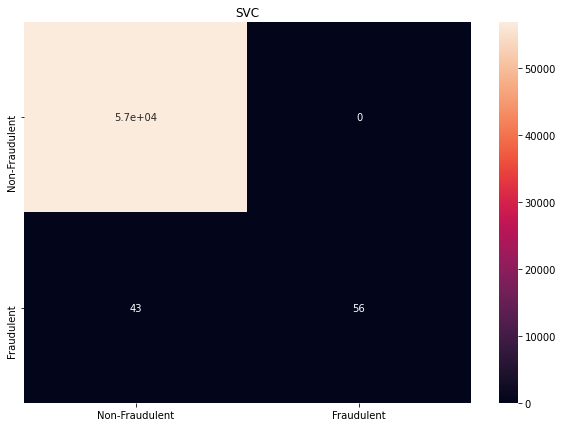

In [ ]:
print("For Isolation Forest")
print(classification_report(Ytest,ipred))
print(confusion_matrix(Ytest,ipred))
df = pd.DataFrame(confusion_matrix(Ytest,ipred), index = [i for i in ['Non-Fraudulent','Fraudulent']],columns = [i for i in ['Non-Fraudulent','Fraudulent']])
plt.figure(figsize = (10,7))
plt.title("Isolation Forest")
sns.heatmap(df, annot=True)
print("For Logistic Regression")
print(classification_report(Ytest,lpred))
print(confusion_matrix(Ytest,lpred))
df = pd.DataFrame(confusion_matrix(Ytest,lpred), index = [i for i in ['Non-Fraudulent','Fraudulent']],columns = [i for i in ['Non-Fraudulent','Fraudulent']])
plt.figure(figsize = (10,7))
plt.title("Logistic Regression")
sns.heatmap(df, annot=True)
print("For KNN") 
print(classification_report(Ytest,kpred))
print(confusion_matrix(Ytest,kpred))
df = pd.DataFrame(confusion_matrix(Ytest,kpred), index = [i for i in ['Non-Fraudulent','Fraudulent']],columns = [i for i in ['Non-Fraudulent','Fraudulent']])
plt.figure(figsize = (10,7))
plt.title("KNN")
sns.heatmap(df, annot=True)
print("For SVC")
print(classification_report(Ytest,spred))
print(confusion_matrix(Ytest,spred))
df = pd.DataFrame(confusion_matrix(Ytest,spred), index = [i for i in ['Non-Fraudulent','Fraudulent']],columns = [i for i in ['Non-Fraudulent','Fraudulent']])
plt.figure(figsize = (10,7))
plt.title("SVC")
sns.heatmap(df, annot=True)

In [ ]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

**Building an ANN model**

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim= 30, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(Xtrain,Ytrain,epochs=10)

Epoch 1/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.0092
Epoch 2/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.0030
Epoch 3/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.0026
Epoch 4/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.0024
Epoch 5/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.0023
Epoch 6/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.0021
Epoch 7/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.0018
Epoch 8/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.0018
Epoch 9/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.0017
Epoch 10/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.0016


**Testing ANN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


For ANN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.96      0.71      0.81        99

    accuracy                           1.00     56960
   macro avg       0.98      0.85      0.91     56960
weighted avg       1.00      1.00      1.00     56960

[[56858     3]
 [   29    70]]


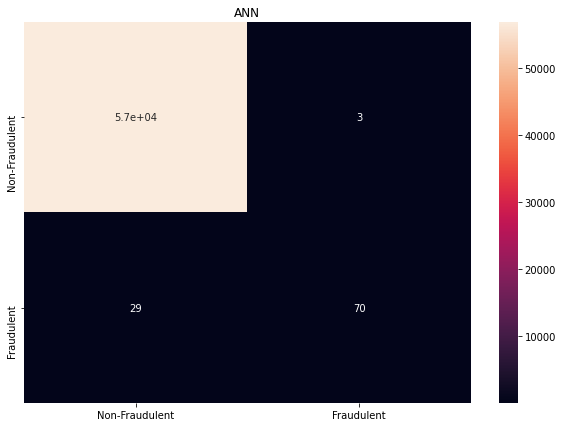

In [ ]:
apred = model.predict_classes(Xtest)
print("For ANN")
print(classification_report(Ytest,apred))
print(confusion_matrix(Ytest,apred))
df = pd.DataFrame(confusion_matrix(Ytest,apred), index = [i for i in ['Non-Fraudulent','Fraudulent']],columns = [i for i in ['Non-Fraudulent','Fraudulent']])
plt.figure(figsize = (10,7))
plt.title("ANN")
sns.heatmap(df, annot=True)

**Building and testing a weighted ANN**

Epoch 1/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.4199
Epoch 2/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.2808
Epoch 3/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.2326
Epoch 4/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.1915
Epoch 5/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.1792
Epoch 6/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.1726
Epoch 7/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.1397
Epoch 8/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.1542
Epoch 9/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.1045
Epoch 10/10
7120/7120 [==============================] - 11s 2ms/step - loss: 0.1162


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


For ANN2
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56861
           1       0.11      0.89      0.20        99

    accuracy                           0.99     56960
   macro avg       0.56      0.94      0.60     56960
weighted avg       1.00      0.99      0.99     56960

[[56174   687]
 [   11    88]]


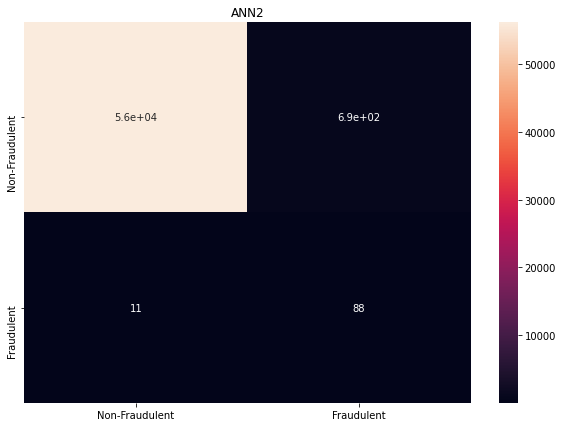

In [ ]:
weights_assigned={0:1,1:600}
# define model
model2 = Sequential()
# define first hidden layer and visible layer
model2.add(Dense(50, input_dim=30, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model2.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model2.compile(loss='binary_crossentropy', optimizer='adam')
model2.fit(Xtrain,Ytrain,class_weight=weights_assigned,epochs=10)
apred2 = model2.predict_classes(Xtest)
print("For ANN2")
print(classification_report(Ytest,apred2))
print(confusion_matrix(Ytest,apred2))
df = pd.DataFrame(confusion_matrix(Ytest,apred2), index = [i for i in ['Non-Fraudulent','Fraudulent']],columns = [i for i in ['Non-Fraudulent','Fraudulent']])
plt.figure(figsize = (10,7))
plt.title("ANN2")
sns.heatmap(df, annot=True)

For Isolation Forest: 0.5399204048717776
For Logistic Regression: 0.7423978623043008
For KNN: 0.8484760551115347
For SVC: 0.7828282828282829
For ANN: 0.853508973415412
For ANN2: 0.9384033969778153


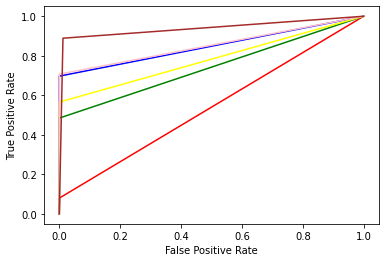

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
fpr, tpr, th = roc_curve(Ytest,ipred)
pyplot.plot(fpr, tpr, 'red',label="Isolation Forest")
fpr, tpr, th = roc_curve(Ytest,lpred)
pyplot.plot(fpr, tpr, 'green',label="Logistic Regression")
fpr, tpr, th = roc_curve(Ytest,kpred)
pyplot.plot(fpr, tpr, 'blue',label="KNN")
fpr, tpr, th = roc_curve(Ytest,spred)
pyplot.plot(fpr, tpr, 'yellow',label="SVC")
fpr, tpr, th = roc_curve(Ytest,apred)
pyplot.plot(fpr, tpr, 'pink',label="ANN")
fpr, tpr, th = roc_curve(Ytest,apred2)
pyplot.plot(fpr, tpr, 'brown',label="ANN2")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
print("For Isolation Forest:", roc_auc_score(Ytest,ipred))
print("For Logistic Regression:", roc_auc_score(Ytest,lpred))
print("For KNN:", roc_auc_score(Ytest,kpred))
print("For SVC:", roc_auc_score(Ytest,spred))
print("For ANN:", roc_auc_score(Ytest,apred))
print("For ANN2:", roc_auc_score(Ytest,apred2))

**Conclusion: Out of all the models, the weighted ANN produces best results. It correctly identifies 88 fraud transactions out of the total 99 fraud transactions in the test data.**